# Showwcase User Engagement Analysis

Showwcase is an online platform where members of the tech community connect, share their knowledge, work experiences, projects built, people they've worked with - and find new opportunities. Showwcase users can like, follow, comment, and share posts on the platform.

This project is to better understand " user engagement" on the platform through analyzing session-based dataset.

## Roadmap

#### Part 1 Data Exploration
   [Part 1.1 Understand the Raw Dataset](#Part-1.1-Understand-the-Raw-Dataset)
   
   [Part 1.2 Data Cleaning](#Part-1.2-Data-Cleaning)
   
   [Part 1.3 Understand the Features](#Part-1.3-Understand-the-Features)
  
#### Part 2 Trend-based Analysis
   [Part 2.1 Daily-based Trend](#Part-2.1-Daily-based-Trend)
   
   [Part 2.2 Weekday-based Trend](#Part-2.2-Weekday-based-Trend)

#### Part 3 User-based Analysis
   [Part 3.1 Feature Engineering and Modeling](#Part-3.1-Feature-Engineering-and-Modeling)
  
   [Part 3.2 User-based Analysis of Active Score](#Part-3.2-User-based-Analysis-of-Active-Score)
   
   [Part 3.3 Weekday-based Analysis of Cumulative Active Score](#Part-3.3-Weekday-based-Analysis-of-Cumulative-Active-Score) 
   
   [Part 3.4 Weekday-based Analysis of Cumulative Active Score Per User](#Part-3.4-Weekday-based-Analysis-of-Cumulative-Active-Score-Per-User)
   
#### Part 4 Conclusion and Suggestion and Future Work
   [Part 4.1 Conclusion and Suggestion](#Part-4.1-Conclusion-and-Suggestion)
   
   [Part 4.2 Future Work](#Part-4.2-Future-Work)

## Part 1 Data Exploration

### Part 1.1 Understand the Raw Dataset

The first step of our data exploration is to form a basic understanding of the provided raw dataset. This covers different aspects such as the size of the dataset, the statistical characteristics of features (columns), the existence of corrupted or missing values, etc.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [2]:
# load data
df=pd.read_csv('showwcase_sessions.csv',parse_dates=['login_date'])
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [3]:
# number of rows and columns
df.shape

(302, 14)

In [4]:
# check number of not-null values and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              300 non-null    float64       
 1   customer_id             300 non-null    float64       
 2   login_date              300 non-null    datetime64[ns]
 3   projects_added          300 non-null    object        
 4   likes_given             300 non-null    object        
 5   comment_given           300 non-null    object        
 6   inactive_status         300 non-null    object        
 7   bug_occured             300 non-null    object        
 8   session_projects_added  300 non-null    float64       
 9   session_likes_given     299 non-null    float64       
 10  session_comments_given  300 non-null    float64       
 11  inactive_duration       300 non-null    float64       
 12  bugs_in_session         300 non-null    float64   

In [5]:
# check null values
df.isnull().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [6]:
# check the rows with null values
df[df.isnull().any(axis=1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,2019-10-26,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above analysis, we can see that the raw dataset consists of 302 rows and 14 columns and there are 3 rows with null (NaN) values. After examining those 3 rows, we can find that two rows contain null values for all columns while one row only contains one null value for feature (column) '__session_likes_given__'. For the two all-null rows, we can safely discard them since they don't contain any useful information. For the row that contains null value for '__session_likes_given__', we can actually replace its null value with 0. This is because the column '__likes_given__' in this row is "False", which indicates in this session, no likes were given, which makes our filling of 0 valid.

In [7]:
df.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


From our simple statistical summary of all features (columns), we can see that 5 features ('__projects_added__', '__likes_given__', '__comment_given__', '__inactive_status__', '__bug_occured__') are boolean data type and 6 features ('__session_projects_added__', '__session_likes_given__', '__session_comments_given__', '__inactive_duration__', '__bugs_in_session__', '__session_duration__') are numerical data type. For the remaining three columns, the '__login_date__' is datetime data type and the '__session_id__' and '__customer_id__' can be considered as categorical data type. For those numerical features, we can see that the '__session_projects_added__' ranges from 0 to 9, the '__session_likes_given__' ranges from 0 to 27, the '__session_comments_given__' ranges from 0 to 21, the '__bugs_in_session__' ranges from 0 to 5.

### Part 1.2 Data Cleaning

The next step of our data exploration is to clean the raw dataset so that we can transform it into an organized dataframe. This includes cleaning corrupted values, handling data integrity issues, transferring data type, etc. 

In [8]:
df[df['session_id']==862128.0]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,2019-10-26,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0


In [9]:
df['session_likes_given']=df.session_likes_given.fillna(0)

In [10]:
# drop rows with null values
df.dropna(inplace=True)

In [11]:
# check duplicate rows
df.duplicated().sum()

0

In [12]:
print(df['projects_added'].unique())
print(df['likes_given'].unique())
print(df['comment_given'].unique())
print(df['inactive_status'].unique())
print(df['bug_occured'].unique())

[False True]
[True False]
[True False]
[True False]
[False True]


In [13]:
# change data type to bool
df['projects_added']=df['projects_added'] == True
df['likes_given']=df['likes_given'] == True
df['comment_given']=df['comment_given'] == True
df['inactive_status']=df['inactive_status'] == True
df['bug_occured']=df['bug_occured'] == True

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              300 non-null    float64       
 1   customer_id             300 non-null    float64       
 2   login_date              300 non-null    datetime64[ns]
 3   projects_added          300 non-null    bool          
 4   likes_given             300 non-null    bool          
 5   comment_given           300 non-null    bool          
 6   inactive_status         300 non-null    bool          
 7   bug_occured             300 non-null    bool          
 8   session_projects_added  300 non-null    float64       
 9   session_likes_given     300 non-null    float64       
 10  session_comments_given  300 non-null    float64       
 11  inactive_duration       300 non-null    float64       
 12  bugs_in_session         300 non-null    float64   

In [15]:
# check if session_id is unique for each row
len(df.session_id.unique())==df.session_id.nunique()

True

After discarding all-null rows, checking duplicated rows, imputing 0 for null values in '__session_likes_given__' feature, and transfering 5 features to bool data type, we finally obtain a (300, 14)-size organized dataframe.

### Part 1.3 Understand the Features

After the raw dataset has been cleaned, now we can start to dig deeper into statistical characteristics of different features.

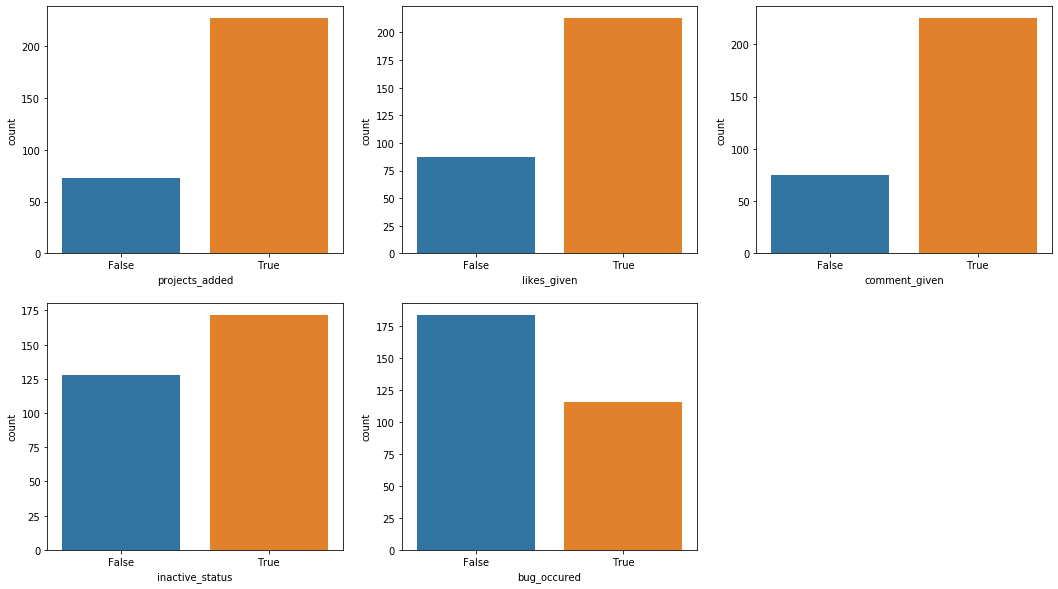

In [16]:
# check feature distribution
fig=plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.countplot(df['projects_added'])
plt.subplot(2,3,2)
sns.countplot(df['likes_given'])
plt.subplot(2,3,3)
sns.countplot(df['comment_given'])
plt.subplot(2,3,4)
sns.countplot(df['inactive_status'])
plt.subplot(2,3,5)
sns.countplot(df['bug_occured'])
plt.show()

From the above bar charts, we can see that the number of sessions where users __added projects, gave likes and comments__ respectively is __more than twice__ than that where users did not added projects, gave likes and comments respectively. The number of sessions where users were __inactive__ is __greater__ than that where users were active. Although the number of sessions where bugs occurred is smaller than that where bugs did not occur, we still have __more than 100 sessions where bugs occurred out of 300__. 


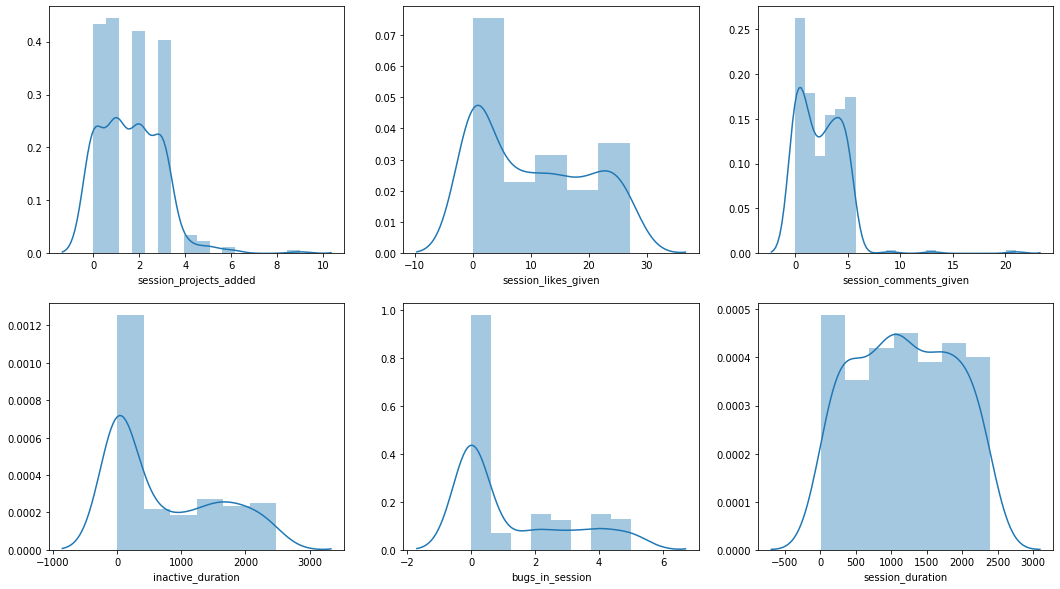

In [17]:
# check feature distribution
fig=plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.distplot(df['session_projects_added'])
plt.subplot(2,3,2)
sns.distplot(df['session_likes_given'])
plt.subplot(2,3,3)
sns.distplot(df['session_comments_given'])
plt.subplot(2,3,4)
sns.distplot(df['inactive_duration'])
plt.subplot(2,3,5)
sns.distplot(df['bugs_in_session'])
plt.subplot(2,3,6)
sns.distplot(df['session_duration'])
plt.show()

From the above, we can see that most users added __fewer than 4 projects__, gave __fewer than 30 likes__ and __fewer than 6 comments__ in each session. The number of bugs in each session mainly ranges from 0 to 5. 

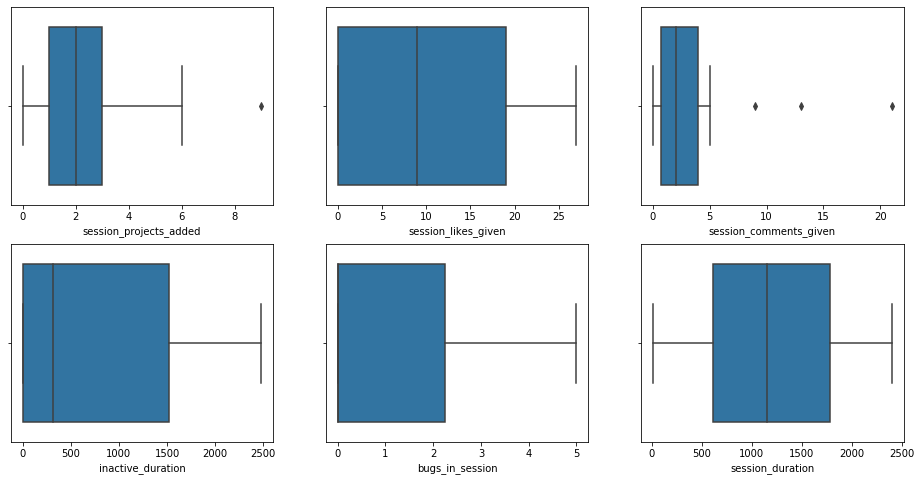

In [18]:
# check feature distribution
fig=plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['session_projects_added'])
plt.subplot(2,3,2)
sns.boxplot(df['session_likes_given'])
plt.subplot(2,3,3)
sns.boxplot(df['session_comments_given'])
plt.subplot(2,3,4)
sns.boxplot(df['inactive_duration'])
plt.subplot(2,3,5)
sns.boxplot(df['bugs_in_session'])
plt.subplot(2,3,6)
sns.boxplot(df['session_duration'])
plt.show()

From the above boxplots, we can find one outlier for feature 'session_projects_added' and three outliers for feature 'session_comments_given'. __At least 50% of data for feature 'bugs_in_session' is 0__.

## Part 2 Trend-based Analysis

### Part 2.1 Daily-based Trend

First, we analyze trend of users' activities across all login date. As a starting point, we visualize how many unique users logined per day. From below trend figure, we can see that the number of unique users logined per day fluctuated dramatically around mid and end of the month. Moreover, there exists bi-weekly pattern with regard to the number of unique users. 

In [19]:
date_login=pd.DataFrame(df.groupby(['login_date']).customer_id.apply(lambda x: len(x.unique()))).reset_index()
date_login.rename(columns={'customer_id':'number_of_unique_users'},inplace=True)

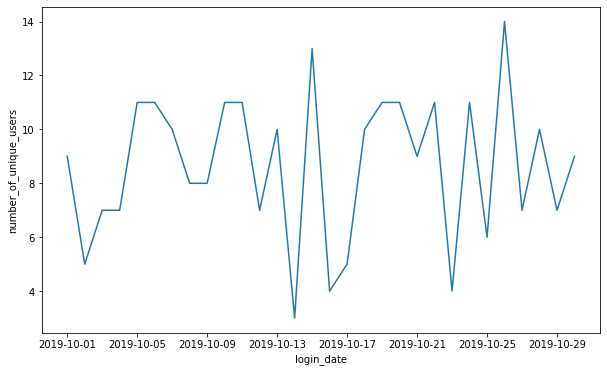

In [20]:
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=date_login, x='login_date', y='number_of_unique_users')

### Part 2.2 Weekday-based Trend

Second, we analyze trend of users' activities across weekdays. As a starting point, we also visualize how many unique users logined per weekday. From below trend figure, we can see that within one week, the number of unique users logined is higher during the period of Sunday-Tuesday than that during the period of Wednesday-Saturday. This indicates that more users tend to engage in the platform during the beginning of the week. 

In [21]:
def weekday_name(date):
    time=pd.Timestamp(date)
    return time.day_name()

In [22]:
df['day_name']=df['login_date'].apply(weekday_name)

In [23]:
week_day=df.groupby(['day_name']).agg({'customer_id':pd.Series.nunique,'session_projects_added':'sum','session_likes_given':'sum',
                              'session_comments_given':'sum','bugs_in_session':'sum'}).reset_index()

In [24]:
cats = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
week_day = week_day.groupby(['day_name']).sum().reindex(cats).reset_index()

In [25]:
week_day=week_day.rename(columns={'customer_id':'number_of_unique_users','session_projects_added':'number_of_projects_added',
                        'session_likes_given':'number_of_likes_added','session_comments_given':'number_of_comments_added',
                        'bugs_in_session':'number_of_bugs_added'})

Text(0, 0.5, 'number_of_unique_users')

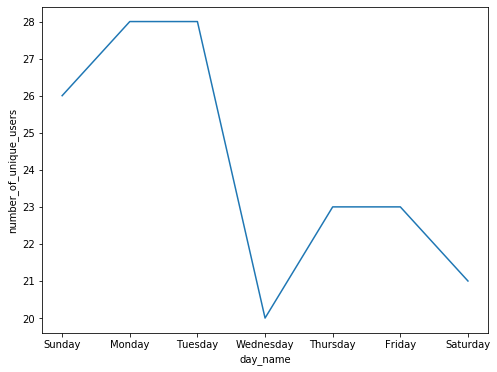

In [26]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(week_day['day_name'],week_day['number_of_unique_users'])
ax.set_xlabel('day_name')
ax.set_ylabel('number_of_unique_users')

Next, we zoom in to analyze trends of various features that are associated with users' activities. To be more specific, we aggregate four features: '__session_projects_added__', '__session_likes_given__', '__session_comments_given__', '__bugs_in_session__' across weekdays and compare their trends along with the number of logined unique users.  

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


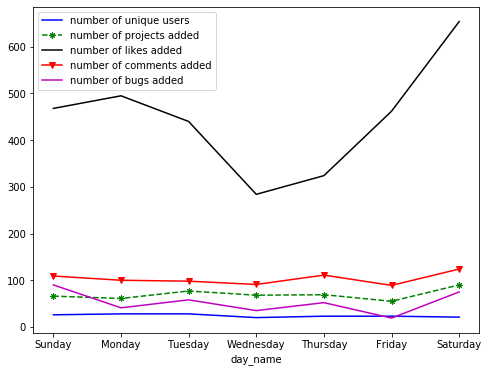

In [27]:
fig=plt.figure(figsize=(8,6))
fig.show()
ax=fig.add_subplot(111)

ax.plot(week_day['day_name'],week_day['number_of_unique_users'],c='b',ls='-',label='number of unique users',fillstyle='none')
ax.plot(week_day['day_name'],week_day['number_of_projects_added'],c='g',marker=(8,2,0),ls='--',label='number of projects added')
ax.plot(week_day['day_name'],week_day['number_of_likes_added'],c='k',ls='-',label='number of likes added')
ax.plot(week_day['day_name'],week_day['number_of_comments_added'],c='r',marker="v",ls='-',label='number of comments added')
ax.plot(week_day['day_name'],week_day['number_of_bugs_added'],c='m',ls='-',label='number of bugs added',fillstyle='none')
ax.set_xlabel('day_name')
plt.legend(loc=2)
plt.draw()

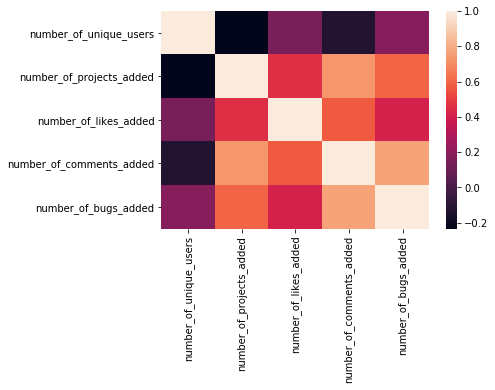

In [28]:
corr=week_day.corr()
sns.heatmap(corr)

From above figure, we can see that the pairwise correlation coefficients among the number of projects added, the number of comments added and the number of bugs added are all over 0.6. Such strong correlation explains why their trends are highly similar within one week. For the number of likes added, its pairwise correlation coefficients with above three features are around 0.4. This is also reasonable because although the number of likes added also has decreasing and increasing trend, its alternating frequency is different than the above three features.

In summary, after analyzing the weekday-based trend of user activities, we find that:
    
1. More users tend to login the website during the beginning of each week.
    
2. The number of different actions conducted per weekday, such as adding projects, giving comments and giving likes, are correlated with each other. For example, when the number of projects added increases on Saturday, it is highly likely that the number of comments added also increases on Saturday. 
    
3. The number of bugs occurred per weekday is also correlated with the number of different actions conducted. This means the more projects added/comments are given, the more bugs will be discovered.

## Part 3 User-based Analysis

### Part 3.1 Feature Engineering and Modeling

First, we need to conduct feature engineering and modeling to obtain representative features that are fittest for our later user-based analysis. To be more specific, our feature engineering and modeling consists of following steps:
    
1. Design representative features
    
2. Calculate representative features via either arithmetic or modeling
    
3. Clean dataset after incorporating representative features

In our analysis, users' engagement in the platform is evaluated from following two aspects:
1. Active time users spend in the platform 
2. Active events users conduct in the platform

Both of above two new features can be calculated via utilizing existing features. For the active time metric, we can obtain it via arithmetic of existing features like '__inactive_duration__' and '__session_duration__'. For the active events metric, we can obtain it via modeling of existing features like '__session_projects_added__', '__session_likes_given__', '__session_comments_given__', etc.  

First, we will show how we obtain the active time metric. Two candidate features can be calculated here: one is the '__active_duration__', which represents the accumulated active duration a user spent in the platform; the other is the '__active_rate__', which represents the proportion of active duration over total login duration a user had. The corresponding arithmetic process can be briefly shown as below: 

In [29]:
# create new columns 
df['active_duration']=df['session_duration']-df['inactive_duration']
df['active_rate']=(df['session_duration']-df['inactive_duration'])/df['session_duration']

In [30]:
df[['active_duration','active_rate']].describe()

,active_duration,active_rate
count,300.000000,300.000000
mean,453.830000,-0.589680
std,1046.406052,4.938411
min,-2085.000000,-50.853659
25%,-227.750000,-0.193125
50%,483.000000,0.756582
75%,1264.250000,1.000000
max,2381.000000,1.000000


After examing our calculation result, we find that both 'active_duration' and 'active_rate' have negative values, which violates common sense in reality. One possible reason for this data integrity issue is that due to some internal bugs in the platform's backend system, the 'inactive_duration' are not recorded properly in some cases, which leads to the negative values in our new 'active_duration' and 'active_rate' features. To overcome this data integrity issue, when we incorporate new active time metric, we need to discard rows containing negative values. 

In [31]:
df_corr=df[(df['active_duration']>=0) & (df['active_rate']>=0)]

Since the two candidate features '__active_duration__' and '__active_rate__' are correlated, we need to select one of them as our final representative active time metric. For both of these two features, the higher their values are, the higher user engagement they tend to indicate. However, using '__active_rate__' sometimes can lead to a misleading conclusion. For example, considering below two users:
1. user 1: total login duration: 10s, total active duration: 10s
2. user 2: total login duration: 50min, total active duration: 30min

If we use '__active_rate__' as our metric, then user 1 will be considered as having more engagement than user 2, which is not true in real cases. Therefore, we determine to select '__active_duration__' as our representative active time metric.
Next, we incorporate the new '__active_duration__' feature into our dataset and discard some redundant old features such as '__inactive_duration__' and '__session_duration__'. After the new dataset is formed, we also draw correlation heatmap for all features, as shown below. We can see that the correlation between the new '__active_duration__' feature with others are all below 0.2, which proves our new feature is not redundant and relatively independent to other features.

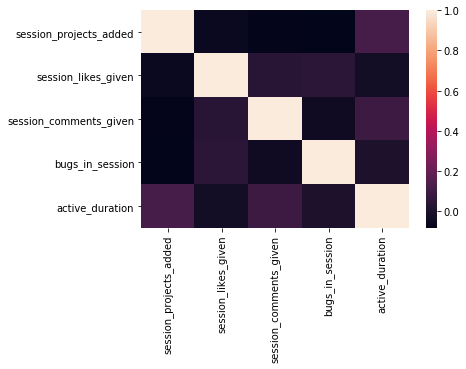

In [32]:
corr=df_corr[['session_projects_added', 'session_likes_given',
       'session_comments_given', 'bugs_in_session', 'active_duration']].corr()
sns.heatmap(corr)

In [33]:
df_model=df_corr.drop(['session_id','login_date','inactive_duration','day_name','session_duration','active_rate'], axis=1)

Second, we will show how we obtain the active events metric. There exist 4 main events in current dataset: adding projects, giving comments, giving likes and encountering bugs. Since bugs are caused by internal system errors and not controlled by users themselves, we only consider the first three events as our active events. Since the relationship among these three events cannot be easily represented by arithmetic equations, we decide to utilize machine-learning based modeling to help us build a new '__active_score__' feature that can represent all three active events in a comprehensive way.

To achieve this purpose, we choose random forest model as our regression technique. This is mainly because the random forest model can not only handle different types of input variables, but also provide feature importance score for all features, which paves the foundation of building our new representative '__active_score__' feature. Our modeling process consists of following steps:
1. Transfer session-based dataset to user-based dataset via aggregation
2. Preprocess user-based dataset via feature scaling
3. Train random forest model from user-based dataset via choosing '__active_duration__' as the target variable
4. Sort all features in descending order via their feature importance scores

In [34]:
df_model=df_model.groupby(['customer_id']).agg({'projects_added':'sum','likes_given':'sum','comment_given':'sum',
                                       'inactive_status':'sum','bug_occured':'sum','session_projects_added':'sum',
                                        'session_likes_given':'sum','session_comments_given':'sum',
                                       'bugs_in_session':'sum','active_duration':'sum'}).reset_index(drop=True)

In [35]:
# feature scaling
lists=['projects_added', 'likes_given', 'comment_given', 'inactive_status',
       'bug_occured', 'session_projects_added', 'session_likes_given',
       'session_comments_given', 'bugs_in_session']
rs_scale = preprocessing.MinMaxScaler().fit(df_model[lists])
df_model[lists] = rs_scale.transform(df_model[lists])

In [36]:
x_train=df_model.drop(['active_duration'], axis = 1)
y_train=df_model['active_duration']

Due to the very small dataset, we do not split the dataset into training and testing data. 

In [37]:
# from sklearn.model_selection import train_test_split
# model_train, model_test = train_test_split(df_model, test_size=0.1, random_state = 123)
# x_train = model_train.drop(['active_duration'], axis = 1)
# x_test = model_test.drop(['active_duration'], axis = 1)
# y_train = model_train['active_duration']
# y_test = model_test['active_duration']

In [38]:
rf_model = RandomForestRegressor(random_state=3)
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [39]:
# random forest score
# from sklearn.metrics import mean_squared_error, r2_score
# from math import sqrt
# rf_score = rf_model.score(x_test, y_test)

# pred_y = rf_model.predict(x_test)
# MSE_rf = mean_squared_error(y_test, pred_y)
# RMSE_rf = sqrt(mean_squared_error(y_test, pred_y))

# # the mean squared error and root mean square error
# print('rf score: ', rf_score)
# print('Mean square error of rf: ', MSE_rf)
# print('Root mean squared error of rf:', RMSE_rf)

In [40]:
importances = rf_model.feature_importances_ 
indices = np.argsort(importances)[::-1] 
for f in range(9): 
    print("%d. %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]])) 

1. session_projects_added (0.285427)
2. comment_given (0.224938)
3. session_comments_given (0.128259)
4. projects_added (0.108360)
5. bugs_in_session (0.086593)
6. session_likes_given (0.075445)
7. likes_given (0.057455)
8. bug_occured (0.023318)
9. inactive_status (0.010205)


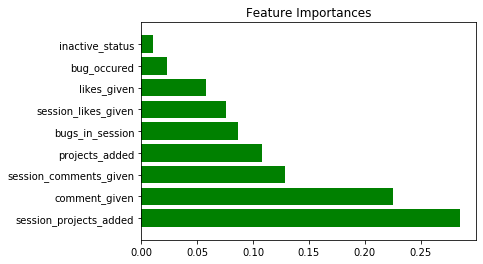

In [41]:
indices=indices[:9]
plt.figure() 
plt.title("Feature Importances") 
plt.barh(range(9),importances[indices],color="g", align="center") 
plt.yticks(range(9),df_model.columns[indices],fontsize=10) 
plt.ylim([-1, 9]) 
plt.show()

After training the random forest model, the feature importances scores are obtained for all features, as shown above. We can see that the order of the importance of the three active events that affect users' active duration is: adding projects > giving comments > giving likes. This observation is convincing because adding projects usually takes users much more time than giving comments or likes, which requires more engagement from users. 

Now, we can utilize the feature importance scores of those three active events as our weighting parameters to build our representative '__active_score__' feature, as shown below.  

### Part 3.2 User-based Analysis of Active Score

In [42]:
# using all data to calculate active score
df_user=df.drop(['session_id'],axis=1)

In [43]:
df_user=df_user.groupby(['customer_id']).agg({'session_projects_added':'sum',
                                        'session_likes_given':'sum','session_comments_given':'sum'}).reset_index()

In [44]:
df_user['active_score']=df_user['session_projects_added']*0.285427+df_user['session_comments_given']*0.128259+df_user['session_likes_given']*0.075445

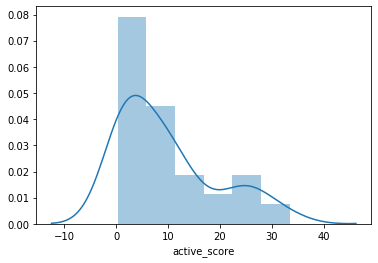

In [45]:
sns.distplot(df_user['active_score'])

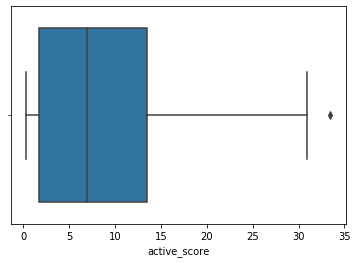

In [46]:
sns.boxplot(df_user['active_score'])

In [47]:
df_user['active_score'].describe()

count    48.000000
mean      9.734105
std       9.426128
min       0.285427
25%       1.707881
50%       6.903804
75%      13.433883
max      33.457195
Name: active_score, dtype: float64

From the above distplot, we can see that the distribution of '__active_score__' can be roughly considered as skewed Gaussian curve centering at around 7 with long right tail. From the above boxplot, we can see that the interquartile range of '__active_score__' is [1.707, 13.433]. If we take 25% quartile as the criteria, the '__active_score__' can be categorized into 4 engagement levels: 

Engagement Level 1 (Highly inactive):      0 <= User's '__active_score__' < 1.708

Engagement Level 2 (Relatively inactive):   1.708 <= User's '__active_score__' < 6.904

Engagement Level 3 (Relatively active):    6.904 <= User's '__active_score__' < 13.434

Engagement Level 4 (Highly active):      13.434 <= User's '__active_score__'

### Part 3.3 Weekday-based Analysis of Cumulative Active Score 

In [48]:
week_day['active_score']=week_day['number_of_projects_added']*0.285427+week_day['number_of_comments_added']*0.128259+week_day['number_of_likes_added']*0.075445

Text(0, 0.5, 'active_score')

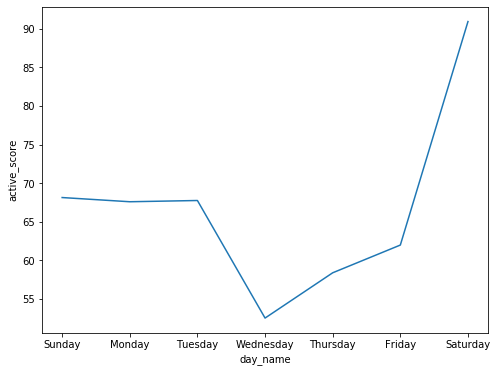

In [49]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(week_day['day_name'],week_day['active_score'])
ax.set_xlabel('day_name')
ax.set_ylabel('active_score')

Second, we analyze trend of all logined users' cumulative '__active_score__' across weekdays. From above trend figure, we can see that within one week, the logined users' cumulative '__active_score__' remains relatively stable from Sunday to Tuesday, it then drops to the lowest point on Wednesday and bounces back significantly till Saturday. The overall trend of this cumulative '__active_score__' across weekdays is similar to the number of unique users logined across weekday, which indicates that most users' engagement level degrades when reaching the mid of the week and bounces back when approching the weekend. 

### Part 3.4 Weekday-based Analysis of Cumulative Active Score Per User

After analyzing the trends of cumulative active score across weekdays, now we zoom in to analyze trend of '__active_score__' per User. To makes our analysis more representative, we will select users with top-2 highest active scores and top-2 lowst scores, respectively.

In [50]:
df_dayname_user=df.groupby(['day_name','customer_id']).agg({'session_projects_added':'sum','session_likes_given':'sum',
                              'session_comments_given':'sum'}).reset_index()

In [51]:
df_dayname_user['active_score']=df_dayname_user['session_projects_added']*0.285427+df_dayname_user['session_comments_given']*0.128259+df_dayname_user['session_likes_given']*0.075445

In [52]:
df_user_sort=df_user.sort_values(by=['active_score'],ascending=False)

In [53]:
df_user_sort.head(2)

,customer_id,session_projects_added,session_likes_given,session_comments_given,active_score
40,87323.0,38.0,230.0,41.0,33.457195
9,23404.0,25.0,207.0,64.0,30.961366


In [54]:
df_user_sort.tail(2)

,customer_id,session_projects_added,session_likes_given,session_comments_given,active_score
20,33496.0,2.0,0.0,0.0,0.570854
28,43096.0,1.0,0.0,0.0,0.285427


In [55]:
df_dayname_user_eg=df_dayname_user[df_dayname_user['customer_id'].isin([87323.0, 23404.0, 33496.0, 43096.0])]

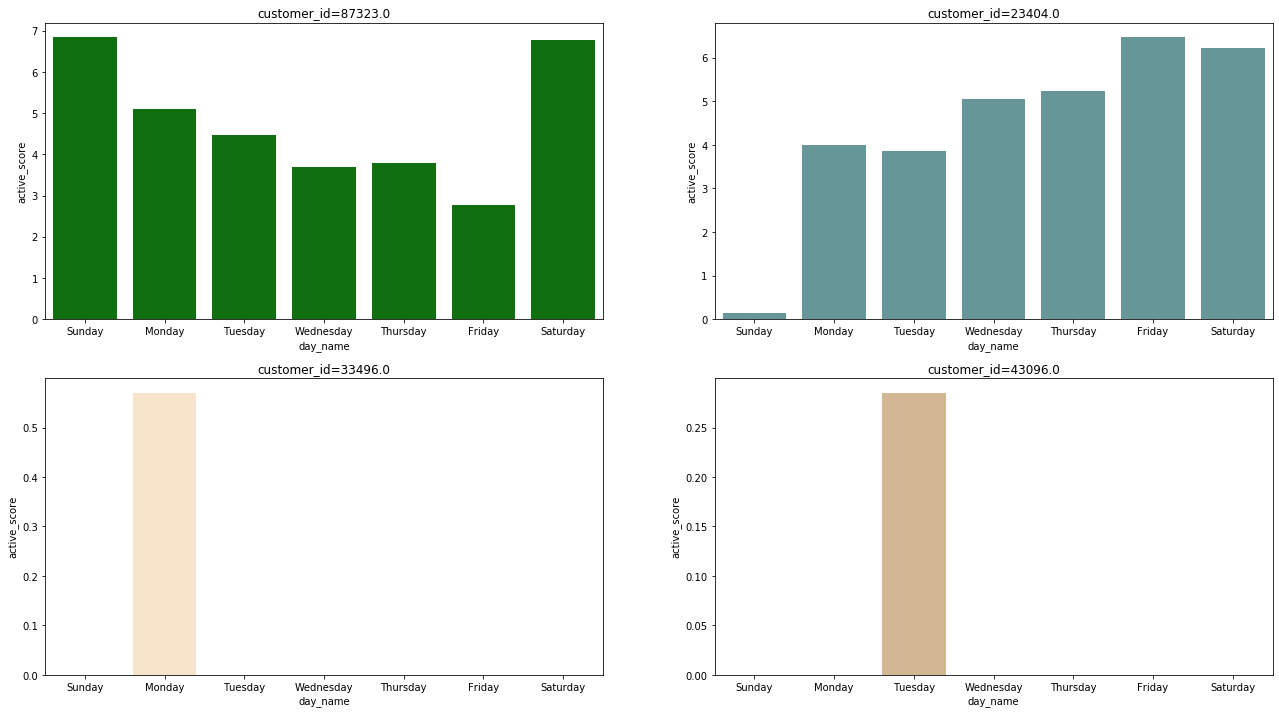

In [56]:
# visualize distribution of active_score by week day for top 2 and last 2 users respectively
fig=plt.figure(figsize=(22,12))

plt.subplot(2,2,1)
plt.title("customer_id=87323.0")
sns.barplot(x='day_name',y='active_score',color="green",data=df_dayname_user_eg[df_dayname_user_eg['customer_id']==87323.0].groupby(['day_name']).sum().reindex(cats).reset_index())

plt.subplot(2,2,2)
plt.title("customer_id=23404.0")
sns.barplot(x='day_name',y='active_score',color='cadetblue',data=df_dayname_user_eg[df_dayname_user_eg['customer_id']==23404.0].groupby(['day_name']).sum().reindex(cats).reset_index())

plt.subplot(2,2,3)
plt.title("customer_id=33496.0")
sns.barplot(x='day_name',y='active_score',color='bisque',data=df_dayname_user_eg[df_dayname_user_eg['customer_id']==33496.0].groupby(['day_name']).sum().reindex(cats).reset_index())

plt.subplot(2,2,4)
plt.title("customer_id=43096.0")
sns.barplot(x='day_name',y='active_score',color='burlywood',data=df_dayname_user_eg[df_dayname_user_eg['customer_id']==43096.0].groupby(['day_name']).sum().reindex(cats).reset_index())

plt.show()

For the top-2 active users, we can see that they have active scores larger than 2 for almost all weekdays and they usually have higher active scores during the weekend. In contrast, for the top-2 inactive users, they have active scores equal to zero for most weekdays and even their highest active score are less than 1. 

## Part 4 Conclusion and Suggestion and Future Work

### Part 4.1 Conclusion and Suggestion 

In this project, we have analyzed users'engagement status in the website platform. After cleaning raw dataset, we have conducted both trend-based analysis and user-based analysis. In trend-based analysis, we analyze both daily-based trend and weekday-based trend of users' activities. In user-based analysis, we first build representative features '__active_duration__' and '__active_score__' via feature engineering and modeling (Random Forest Model). Then we analyze both user-based '__active_score__'and its trend across weekdays. 

Conclusion:
1. More users tend to login the website during the beginning of each week.
2. The number of different actions conducted per weekday, such as adding projects, giving comments and giving likes, are correlated with each other. For example, when the number of projects added increases on Saturday, it is highly likely that the number of comments added also increases on Saturday. 
3. The number of bugs occurred per weekday is also correlated with the number of different actions conducted. This means the more projects added/comments are given, the more bugs will be discovered.
4. Within one week, the logined users' cumulative '__active_score__' remains relatively stable from Sunday to Tuesday, it then drops to the lowest point on Wednesday and bounces back significantly till Saturday. Therefore, most users' engagement level degrades when reaching the mid of the week and bounces back when approching the weekend. 

Suggestion:
1. The platform can recommend different contents to users based on their active scores per weekday. For example, during the mid of the week when most users have low active scores due to being busy with other job tasks. The platform can recommend lightweight contents/articles/projects to users so that they can both engage and relax.
2. The platform can design and send surveys to users to collect their feedbacks on potential improvement.
3. The platform needs to fix internal bugs in its backend system to improve the user experience.
4. The platform can improve the data collection components to collect more user-based data.

### Part 4.2 Future Work

Current dataset is still relatively small, which makes many analysis infeasible. When more data are available, following analysis can be done:
1. Unsupervised clustering of various activities to identify groups that affect engagement level most.
2. Supervised learning of various features to predict engagement level in a more accurate way.